Arquivo destinado a explorar os comportamentos entre das diferenças de fase do experimento de 4/10

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
data =  pd.read_json("./data.json")
data.head(1)

,index,mac,timestamp,no,rssi,raw,Angle,Distance,frequency,iq,samples,phase_diffs
0,0,c300000a7a63,2024-10-04 15:45:53.217,0,-52,0201061bff3906cafb0114fff9ffe200fd000000000000...,90,200,2426,"[97, -130, 107, 121, -138, 80, -51, -154, 165,...","{'ref': [{'imag': -130.0, 'real': 97.0}, {'ima...","{'a2-a1': [-1.7849121686, -1.8669463735, 4.570..."


In [6]:
angle = 0
df = data[data["Angle"] == angle]
df.head(1)

,index,mac,timestamp,no,rssi,raw,Angle,Distance,frequency,iq,samples,phase_diffs
7927,0,c300000a7a48,2024-10-04 16:56:25.949,0,-55,0201061bff3906cafb0114feffecff0201000000000000...,0,200,2426,"[-94, -129, 144, -68, 40, 153, -156, 19, 3, -1...","{'ref': [{'imag': -129.0, 'real': -94.0}, {'im...","{'a2-a1': [0.9430831483000001, 0.8075596303, 0..."


C:\Users\pedro\AppData\Local\Temp\ipykernel_18580\718853492.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s = df[data["Distance"] == distance]


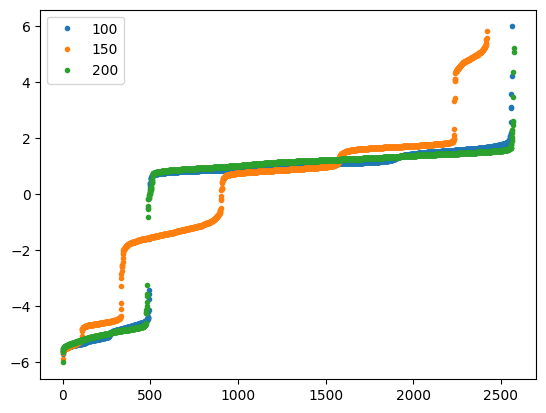

In [7]:
distances =(100,150,200)
for distance in distances:
    s = df[data["Distance"] == distance]
    pd = []
    for d in s.iterrows():
        pd = [*pd,*d[1]["phase_diffs"]["a2-a1"]] 
    pd.sort()
    plt.plot(pd,".")
plt.legend(distances)

C:\Users\pedro\AppData\Local\Temp\ipykernel_18580\3786986970.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s = data[data["Distance"] == distance][data["Angle"] == angle]


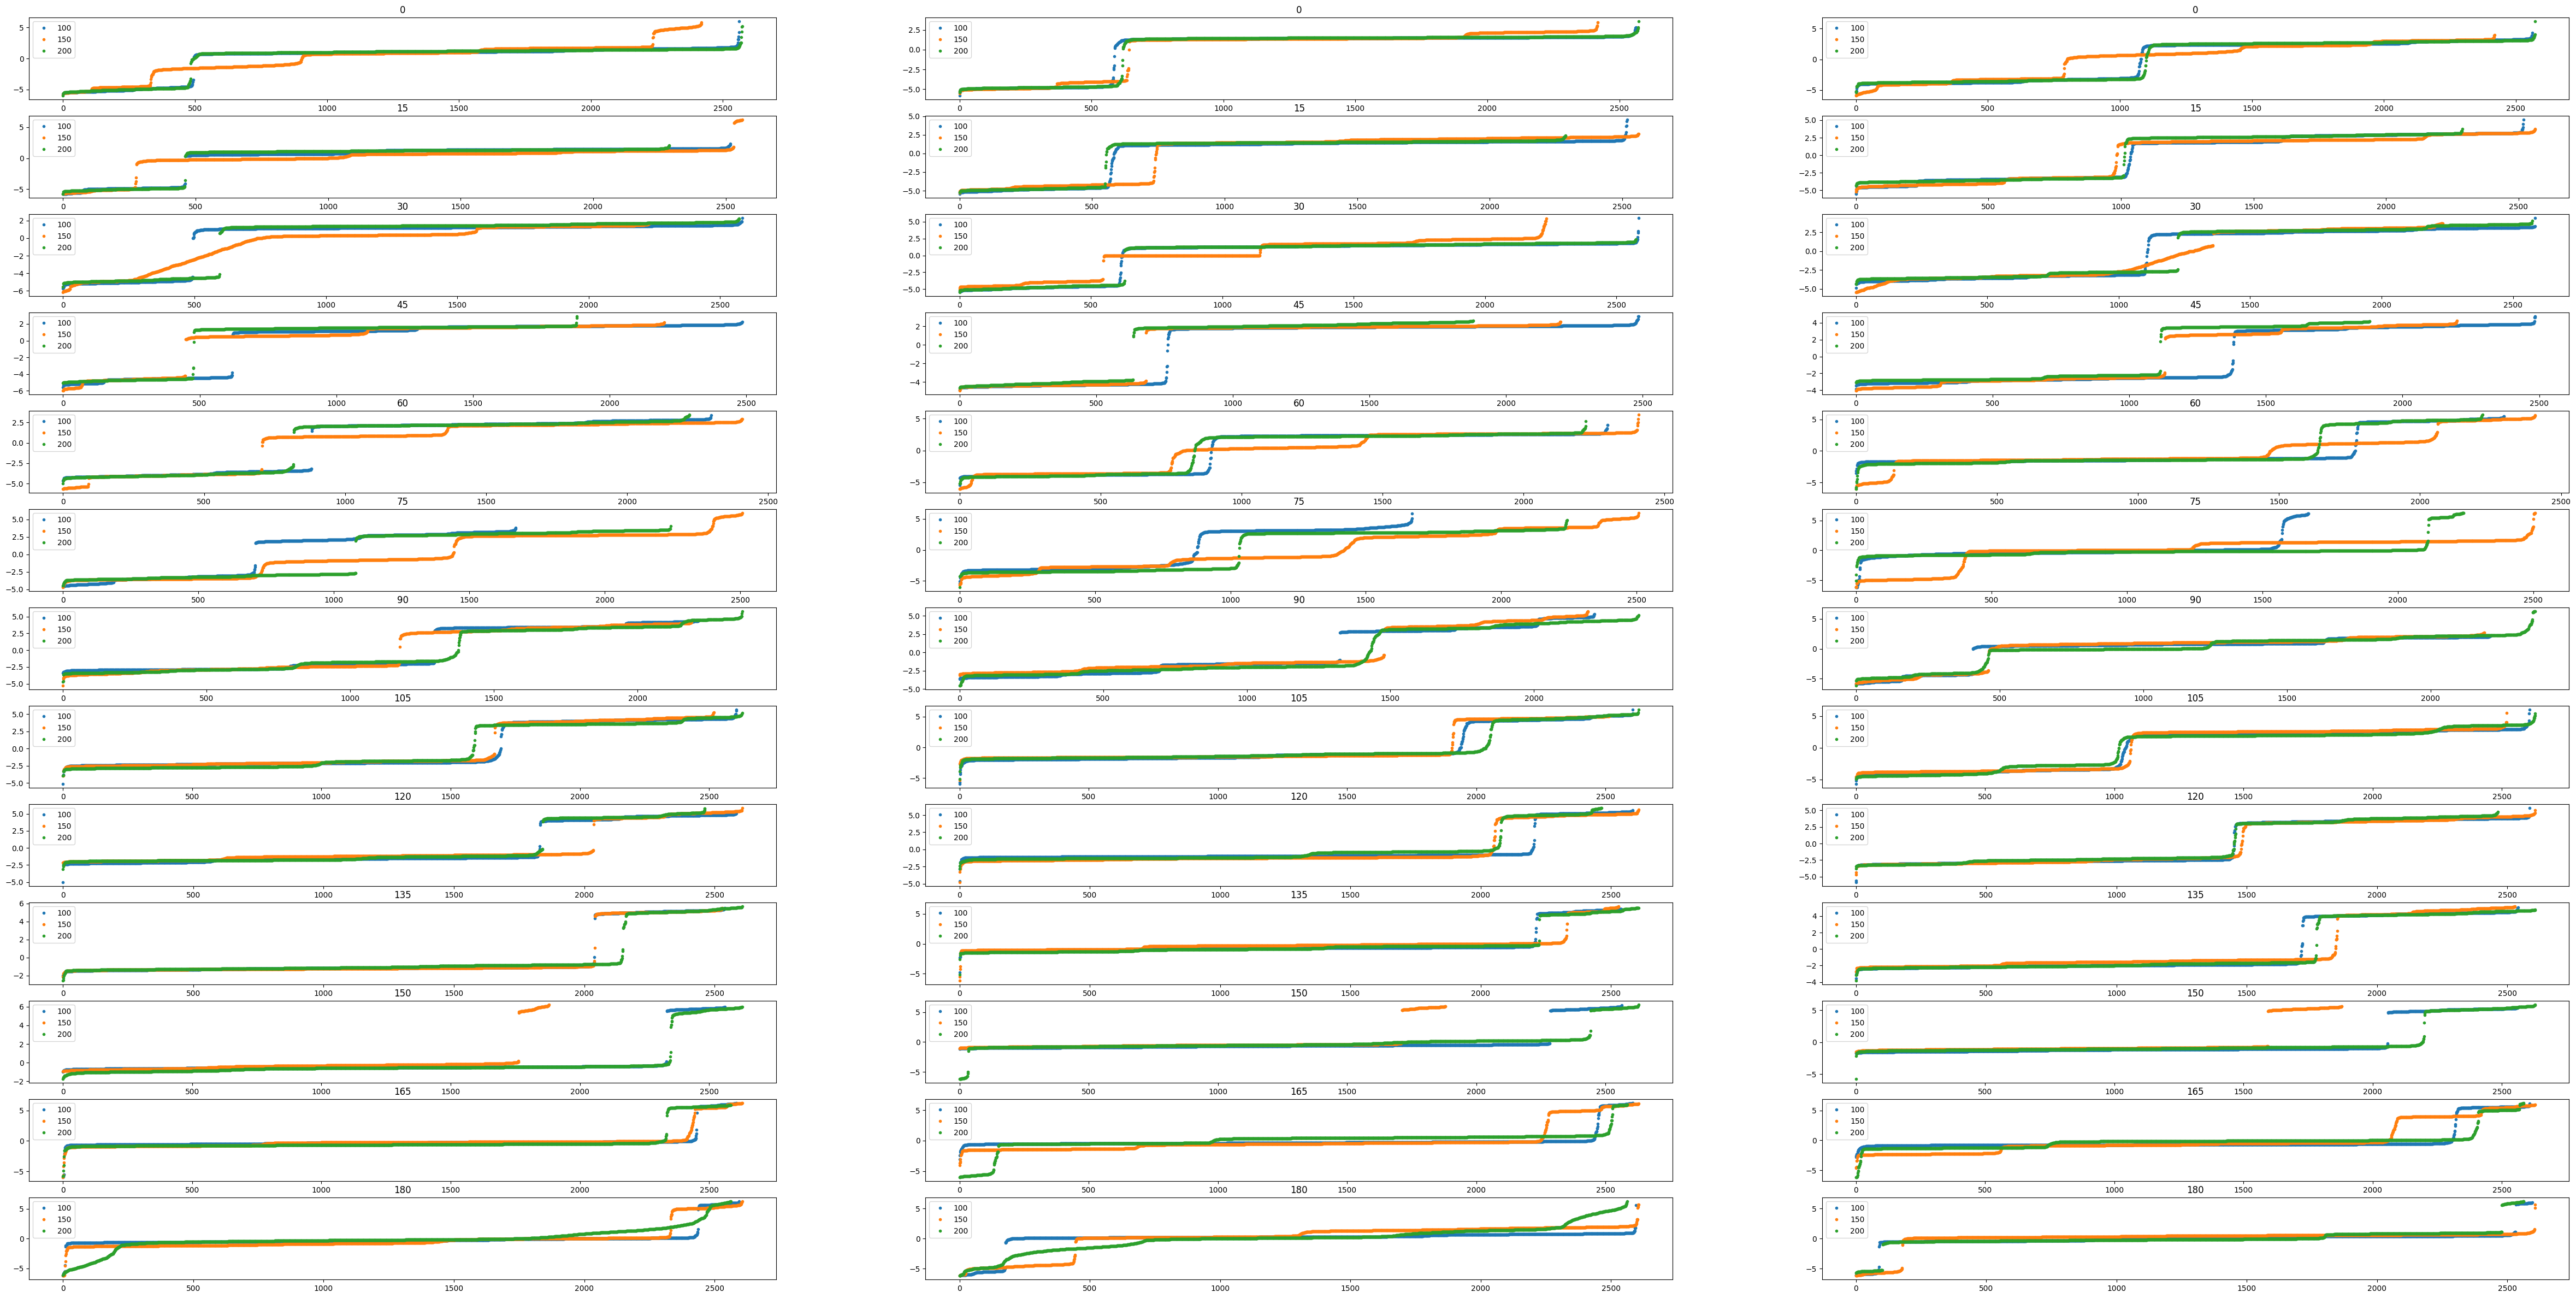

In [27]:
angles = [*range(0,195,15)]
distances =(100,150,200)

f, ax = plt.subplots(len(angles), 3,figsize=(60,30))

for index1,angle in enumerate(angles):
    for distance in distances:
        for index2, diff in enumerate(("a2-a1","a3-a2","a3-a1")):        
            s = data[data["Distance"] == distance][data["Angle"] == angle]
            pd = []
            for d in s.iterrows():
                pd = [*pd,*d[1]["phase_diffs"][diff]] 
            pd.sort()
            ax[index1][index2].plot(pd,".")
            ax[index1][index2].legend(distances)
            ax[index1][index2].set_title(angle)


C:\Users\pedro\AppData\Local\Temp\ipykernel_18580\2737532834.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s = data[data["Distance"] == distance][data["Angle"] == angle]


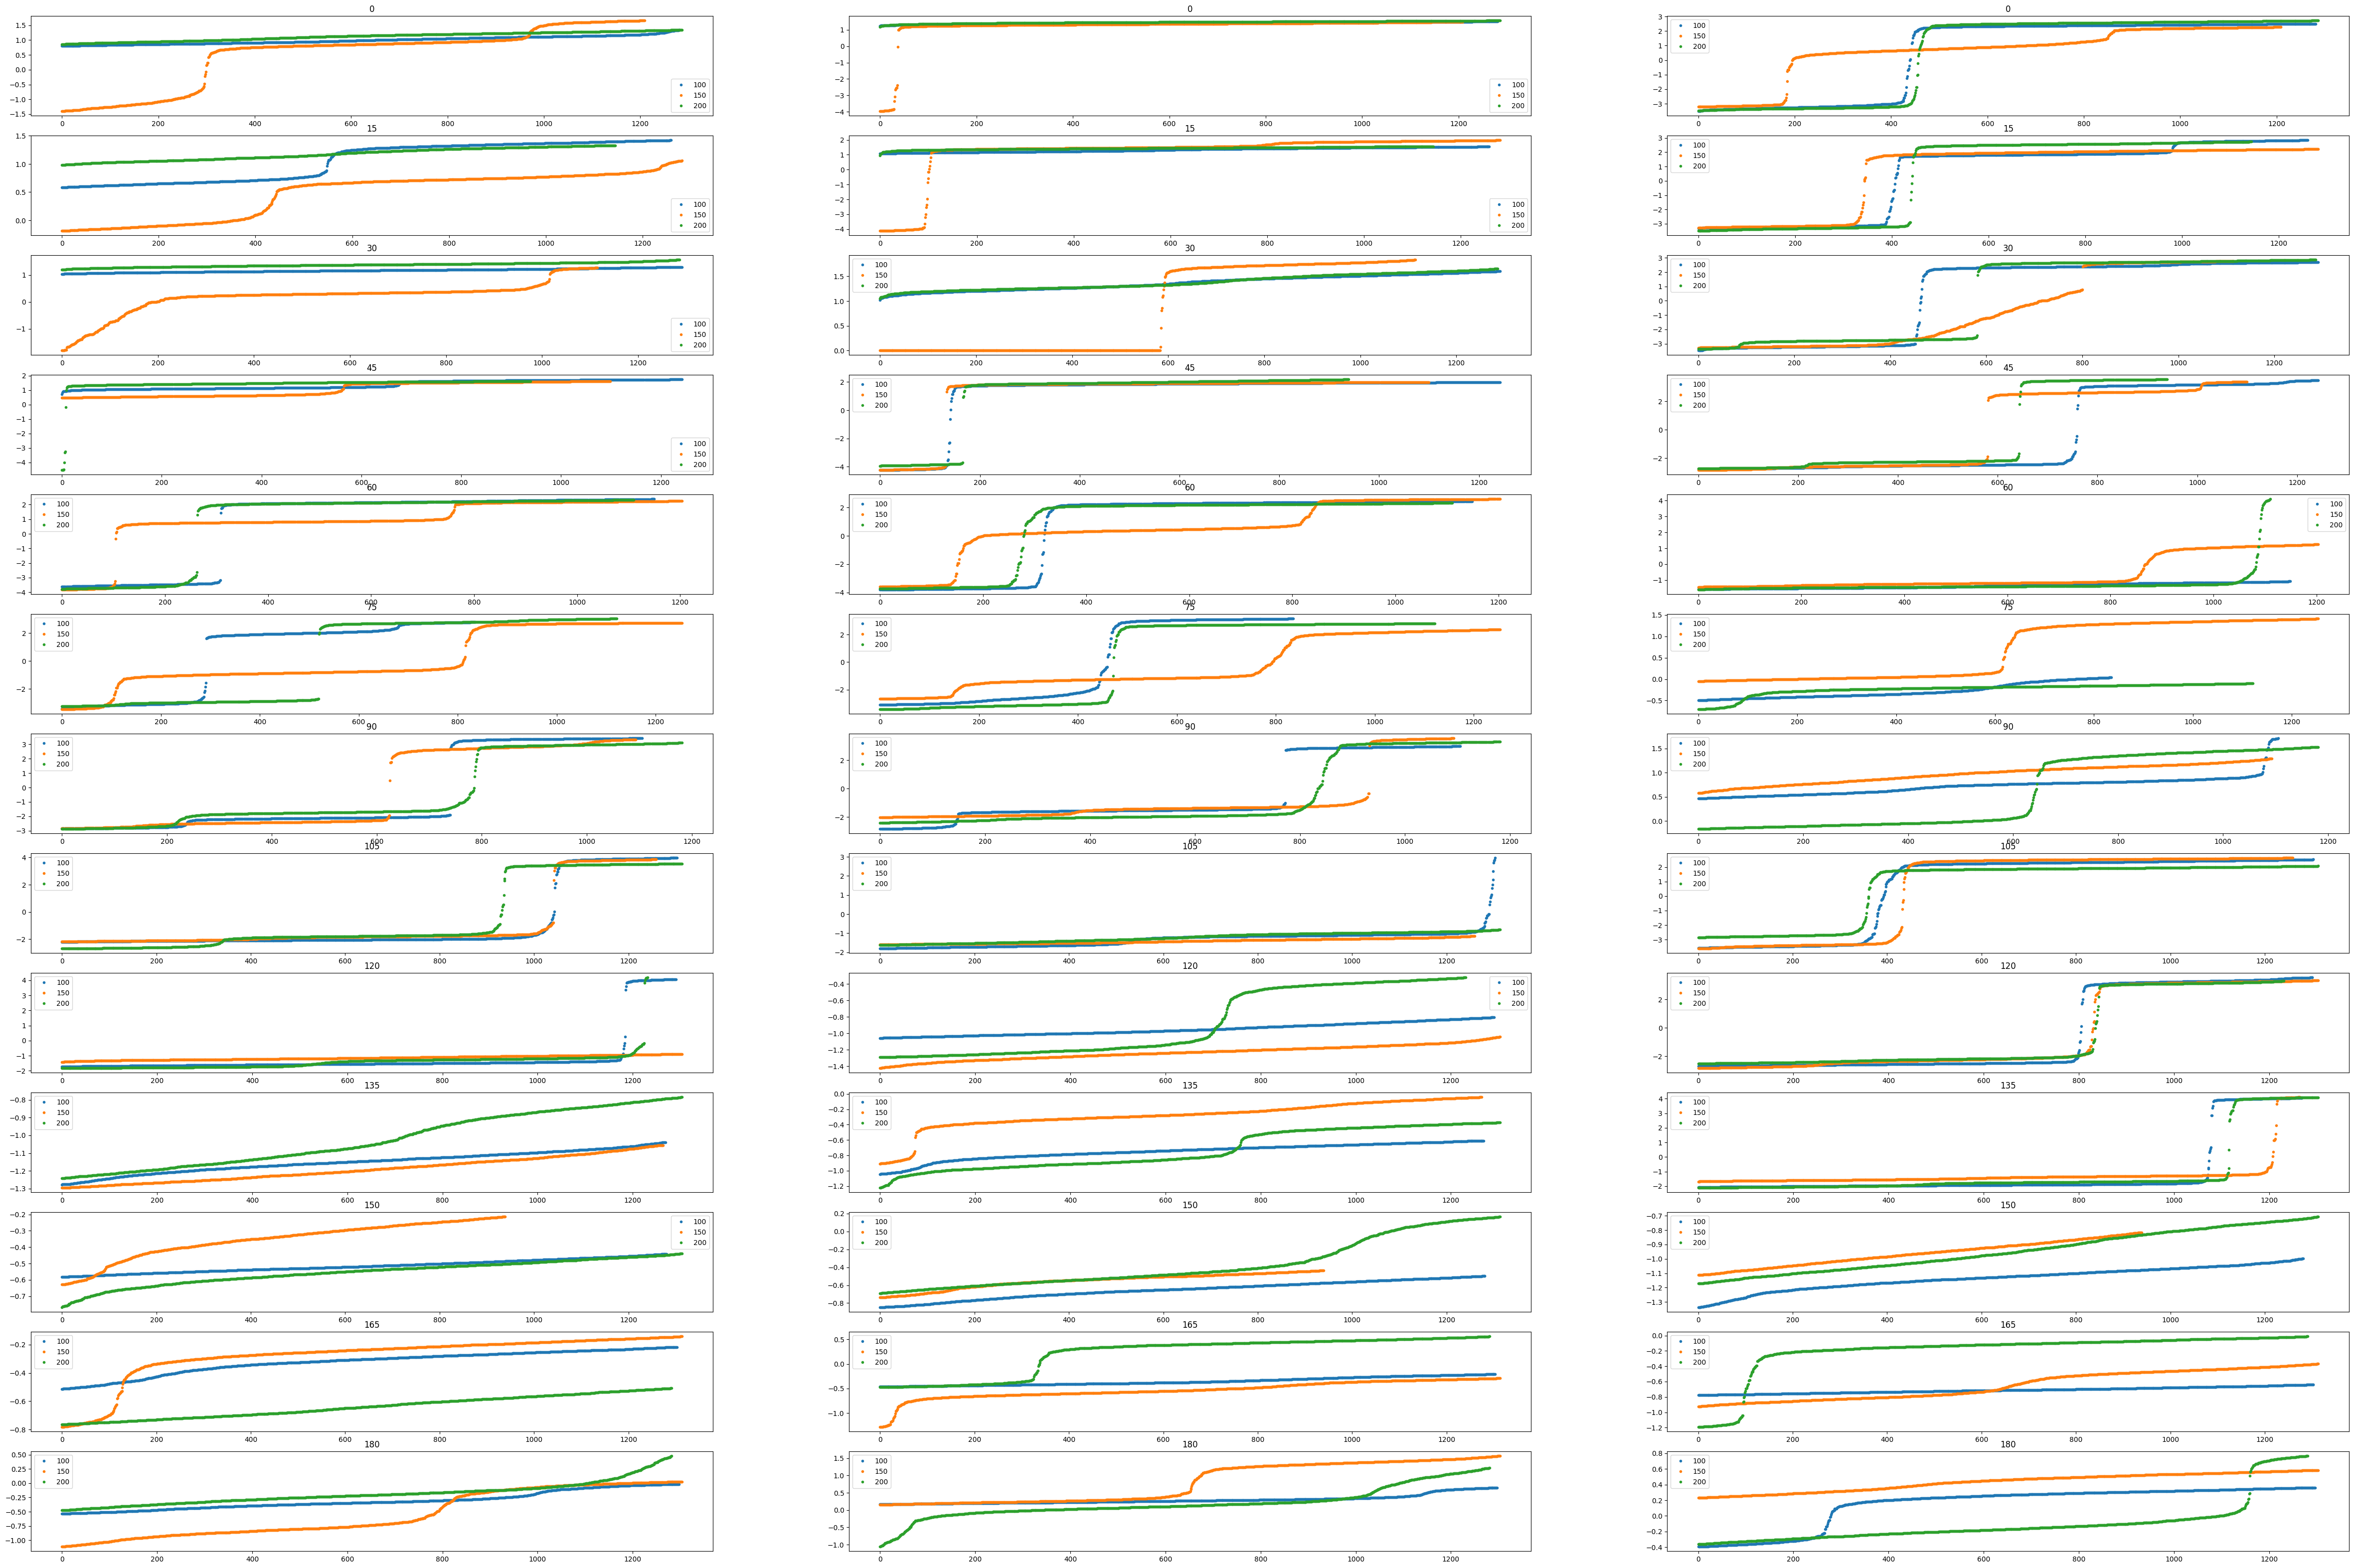

In [30]:
angles = [*range(0,195,15)]
distances =(100,150,200)

f, ax = plt.subplots(len(angles), 3,figsize=(60,40))

for index1,angle in enumerate(angles):
    for distance in distances:
        for index2, diff in enumerate(("a2-a1","a3-a2","a3-a1")):        
            s = data[data["Distance"] == distance][data["Angle"] == angle]
            pd = []
            for d in s.iterrows():
                pd = [*pd,*d[1]["phase_diffs"][diff]] 
            pd.sort()
            ax[index1][index2].plot(pd[int(len(pd)*0.25):int(len(pd)*0.75)],".")
            ax[index1][index2].legend(distances)
            ax[index1][index2].set_title(angle)

C:\Users\pedro\AppData\Local\Temp\ipykernel_18580\2300255332.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s = data[data["Distance"] == distance][data["Angle"] == angle]


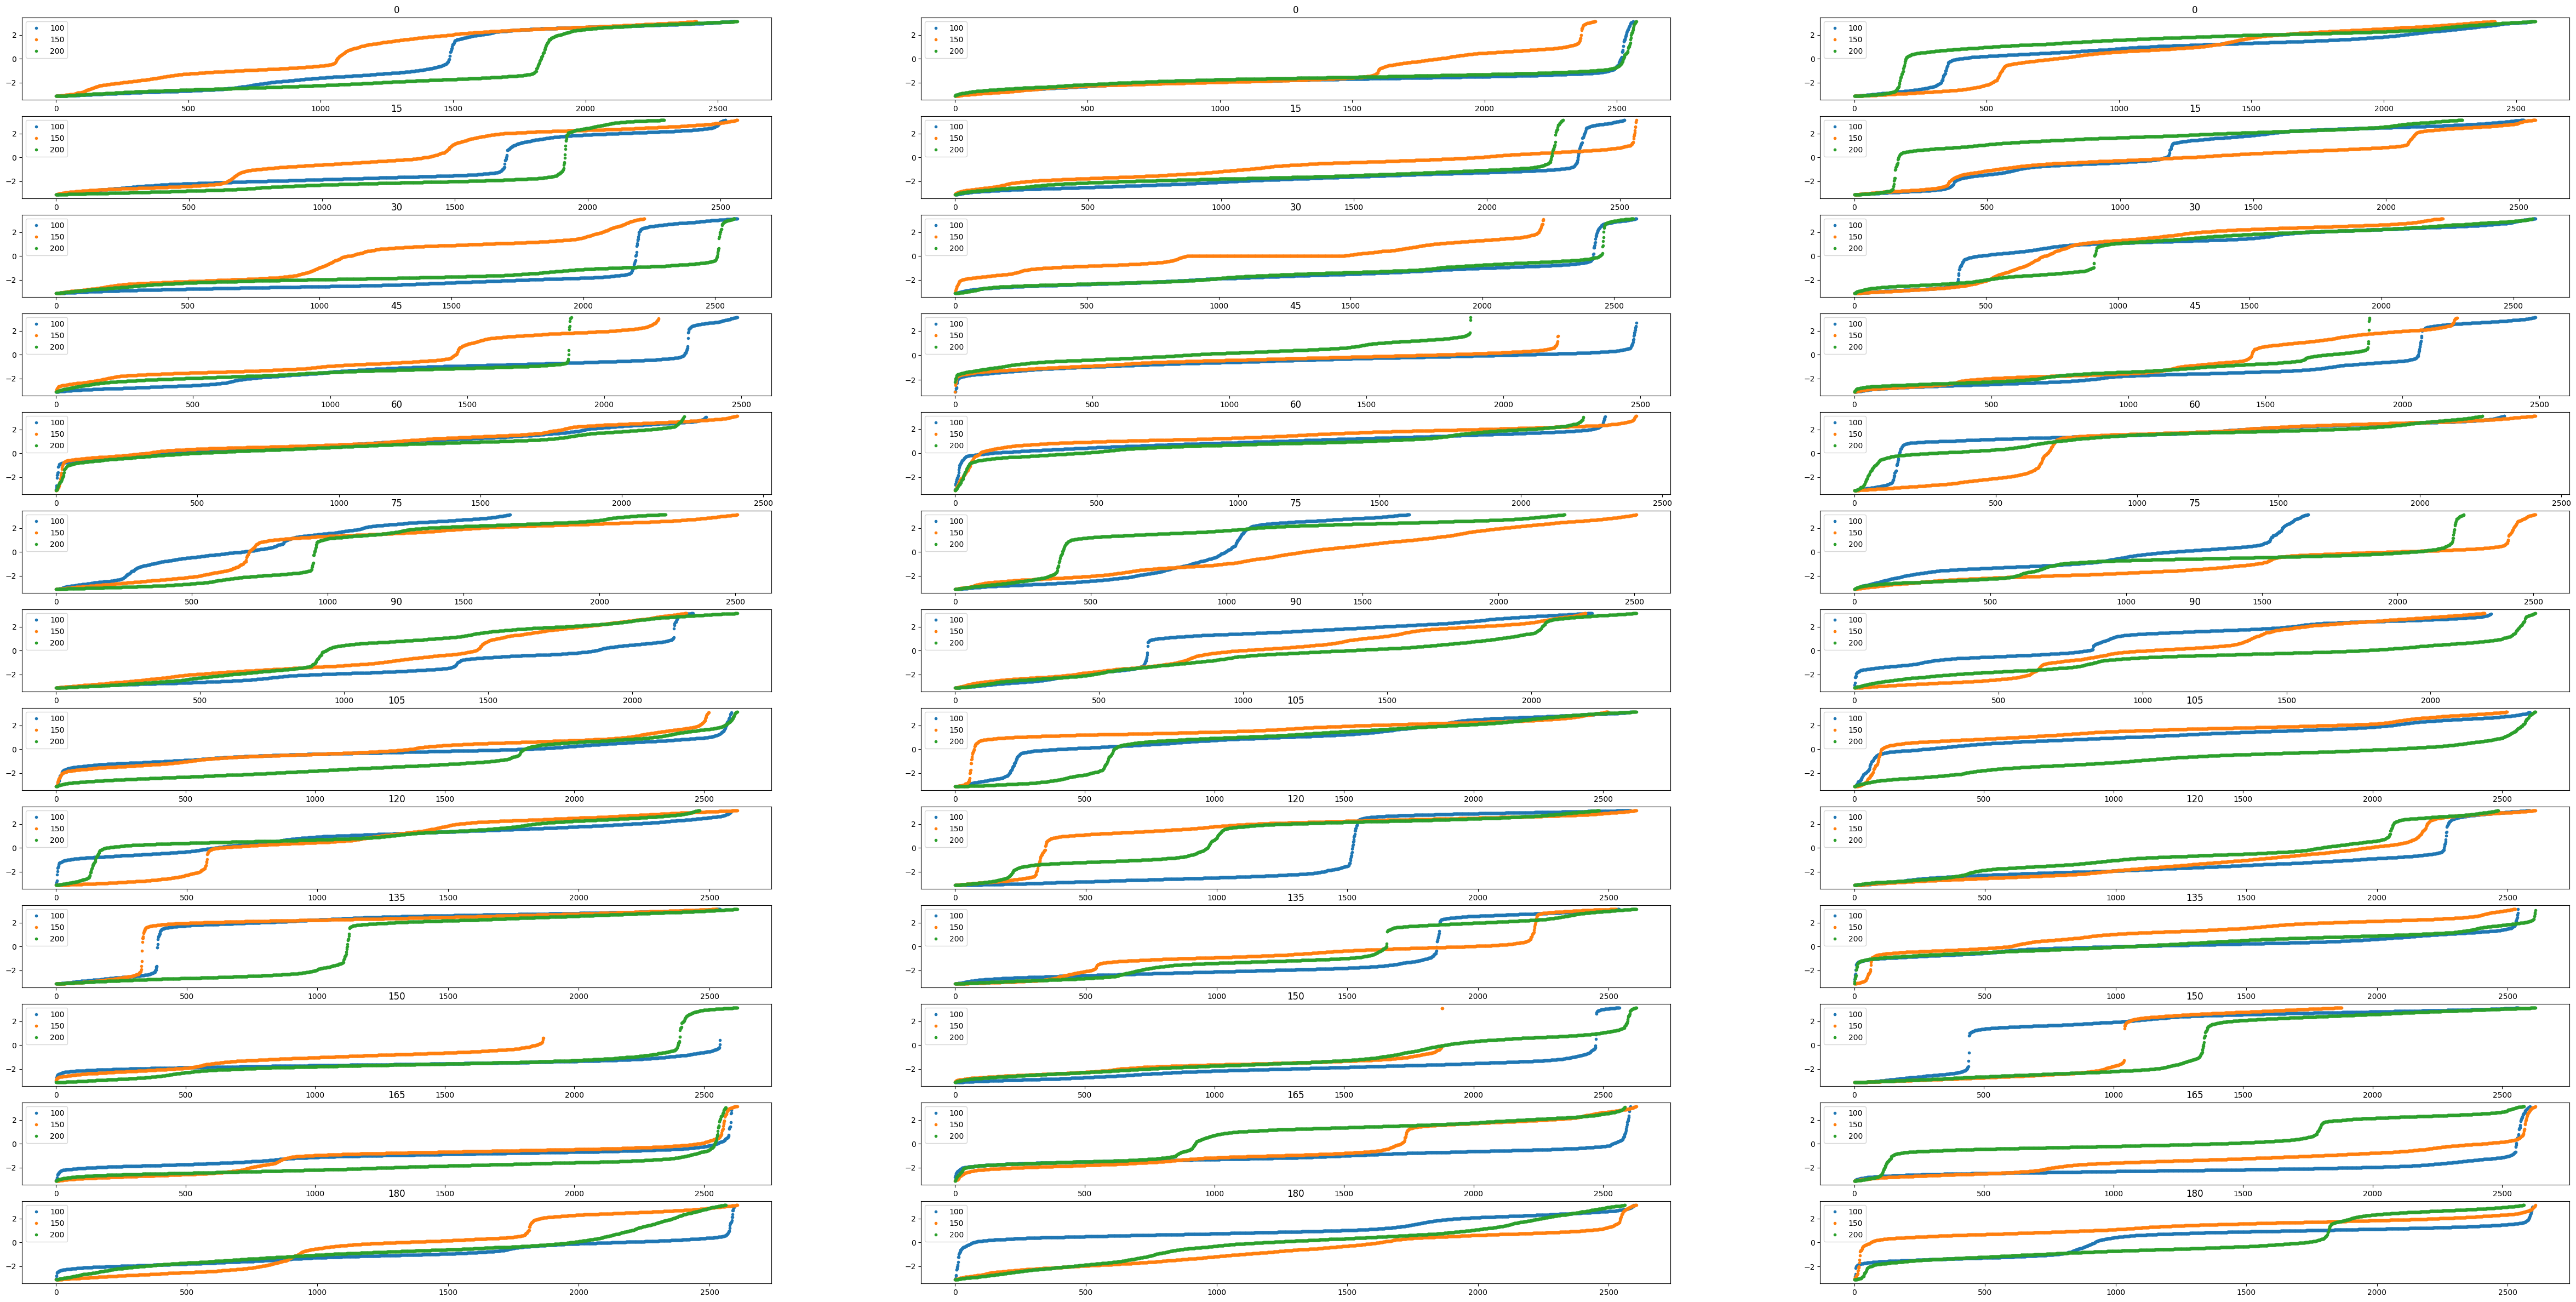

In [39]:
def pm(angle):
    angle = angle%2*np.pi
    if angle > np.pi:
        return angle-2*np.pi
    else: return angle

angles = [*range(0,195,15)]
distances =(100,150,200)

f, ax = plt.subplots(len(angles), 3,figsize=(60,30))

for index1,angle in enumerate(angles):
    for distance in distances:
        for index2, diff in enumerate(("a2-a1","a3-a2","a3-a1")):        
            s = data[data["Distance"] == distance][data["Angle"] == angle]
            pd = []
            for d in s.iterrows():
                pd = [*pd,*d[1]["phase_diffs"][diff]] 
            
            pd = [pm(i) for i in pd]
            pd.sort()
            ax[index1][index2].plot(pd,".")
            ax[index1][index2].legend(distances)
            ax[index1][index2].set_title(angle)


165

In [36]:
270%360

270